## Comparison of ISSUES_ACTIONS of CHAOSS repositories with time
From issue_events.txt data


In [199]:
import pandas as pd
import numpy as np
import re
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [186]:
df_list = []
with open("/Users/pratikmishra/augur/persistence_schema/data/issue_events.txt") as f:
    for line in f:
        
        line = line.strip()
        
        columns = re.split('\s+', line, maxsplit=20)
        df_list.append(columns)
data=pd.DataFrame(df_list)

### Data Preprocessing 
Data is stored in txt format so we have to first extract the data in meaningful manner

In [187]:
data.columns=["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r"]
data.head()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r
0,2083475,336305,277110,referenced,e8a1d9bbea0e89e8eaa4b9dfa3923cebcc2ab809,2019-10-19,15:56:41,MDE1OlJlZmVyZW5jZWRFdmVudDI3MjcxNTE4NDY=,https://api.github.com/repos/chaoss/augur/issu...,GitHub,API,Worker,0.0.3,GitHub,API,2019-10-19,16:06:39,2727151846
1,2083476,336305,277110,merged,e8a1d9bbea0e89e8eaa4b9dfa3923cebcc2ab809,2019-10-19,15:56:41,MDExOk1lcmdlZEV2ZW50MjcyNzE1MTg0OA==,https://api.github.com/repos/chaoss/augur/issu...,GitHub,API,Worker,0.0.3,GitHub,API,2019-10-19,16:06:39,2727151848
2,2083477,336305,277110,closed,\N,2019-10-19,15:56:41,MDExOkNsb3NlZEV2ZW50MjcyNzE1MTg1MA==,https://api.github.com/repos/chaoss/augur/issu...,GitHub,API,Worker,0.0.3,GitHub,API,2019-10-19,16:06:39,2727151850
3,2083478,336306,277110,referenced,755837b6541282df84dddd408fd7692c1c5a43ce,2019-10-19,15:54:33,MDE1OlJlZmVyZW5jZWRFdmVudDI3MjcxNTAzNjc=,https://api.github.com/repos/chaoss/augur/issu...,GitHub,API,Worker,0.0.3,GitHub,API,2019-10-19,16:06:40,2727150367
4,2083479,336306,277110,merged,755837b6541282df84dddd408fd7692c1c5a43ce,2019-10-19,15:54:34,MDExOk1lcmdlZEV2ZW50MjcyNzE1MDM2OQ==,https://api.github.com/repos/chaoss/augur/issu...,GitHub,API,Worker,0.0.3,GitHub,API,2019-10-19,16:06:40,2727150369


In [188]:
data=data.drop(["a","e","g","h","j","k","l","m","n","o","p","q","r"],axis=1)
data.columns=["issue_id","contbr_id","action","created_date","chaoss_repository"]
data.head()

,issue_id,contbr_id,action,created_date,chaoss_repository
0,336305,277110,referenced,2019-10-19,https://api.github.com/repos/chaoss/augur/issu...
1,336305,277110,merged,2019-10-19,https://api.github.com/repos/chaoss/augur/issu...
2,336305,277110,closed,2019-10-19,https://api.github.com/repos/chaoss/augur/issu...
3,336306,277110,referenced,2019-10-19,https://api.github.com/repos/chaoss/augur/issu...
4,336306,277110,merged,2019-10-19,https://api.github.com/repos/chaoss/augur/issu...


Extraxting Chaoss repostiroy name from given url

In [189]:
df=data
data[['a','b','c','d','e','f','g','h',"i"]] = data.chaoss_repository.str.split("/",expand=True,)
data=data.drop(["chaoss_repository","a","b","c","d","e","g","h","i"],axis=1)
data.columns=["issue_id","contbr_id	","action","created_date","chaoss_repository"]
data.head()

,issue_id,contbr_id,action,created_date,chaoss_repository
0,336305,277110,referenced,2019-10-19,augur
1,336305,277110,merged,2019-10-19,augur
2,336305,277110,closed,2019-10-19,augur
3,336306,277110,referenced,2019-10-19,augur
4,336306,277110,merged,2019-10-19,augur


In [190]:
data.chaoss_repository.value_counts()

augur           3157
wg-evolution    2299
grimoirelab     1771
wg-risk          210
wg-common        147
Name: chaoss_repository, dtype: int64

In [191]:
data['created_date'] =pd.to_datetime(data.created_date)
data= data.sort_values(by='created_date')

### Group data by created date and repository name

In [192]:
df = pd.DataFrame(data.groupby(['chaoss_repository','created_date',])['chaoss_repository'].count().reset_index(name="count"))
df.head()

,chaoss_repository,created_date,count
0,augur,2017-01-20,5
1,augur,2017-01-23,13
2,augur,2017-01-24,4
3,augur,2017-01-25,7
4,augur,2017-01-26,2


In [193]:
repo = df['chaoss_repository'].unique().tolist()
df_dict = {name: df.loc[df['chaoss_repository'] == name] for name in repo}


df_augur=pd.DataFrame(df_dict['augur'])
df_augur.columns=["chaoss_augur","created_date","count_augur"]
df_wg_risk=pd.DataFrame(df_dict['wg-risk'])
df_wg_risk.columns=["chaoss_wg_risk","created_date","count_wg_risk"]
df_wg_evolution=pd.DataFrame(df_dict['wg-evolution'])
df_wg_evolution.columns=["chaoss_wg_evolution","created_date","count_wg_evolution"]
df_grimoirelab=pd.DataFrame(df_dict['grimoirelab'])
df_grimoirelab.columns=["chaoss_grimoirelab","created_date","count_grimoirelab"]
df_wg_common=pd.DataFrame(df_dict['wg-common'])
df_wg_common.columns=["chaoss_wg_common","created_date","count_wg_common"]


### Created dataframe with repo name and then it will be merged

In [194]:
df_grimoirelab.head()

,chaoss_grimoirelab,created_date,count_grimoirelab
346,grimoirelab,2017-09-25,4
347,grimoirelab,2017-09-28,3
348,grimoirelab,2017-10-04,13
349,grimoirelab,2017-10-06,3
350,grimoirelab,2017-10-08,2


In [166]:
df = pd.DataFrame(data.groupby(['chaoss_repository','created_date',])['chaoss_repository'].count().reset_index(name="count"))

In [167]:
df.head()

,chaoss_repository,created_date,count
0,augur,2017-01-20,5
1,augur,2017-01-23,13
2,augur,2017-01-24,4
3,augur,2017-01-25,7
4,augur,2017-01-26,2


In [168]:
df["created_date"][850]

Timestamp('2019-10-13 00:00:00')

In [195]:
df_frame= pd.DataFrame(pd.merge(df_augur, df_wg_risk, how='outer', on='created_date'))
df_frame = pd.DataFrame(pd.merge(df_frame, df_wg_common, how='outer', on='created_date'))
df_frame = pd.DataFrame(pd.merge(df_frame, df_grimoirelab, how='outer', on='created_date'))
df_frame = pd.DataFrame(pd.merge(df_frame, df_wg_evolution, how='outer', on='created_date'))


df_frame.fillna(0,inplace=True)
df_frame= df_frame.sort_values(by='created_date')
df_frame.reset_index(inplace=True)
df_frame=df_frame.drop(["index"],axis=1)
df_frame.head()

,chaoss_augur,created_date,count_augur,chaoss_wg_risk,count_wg_risk,chaoss_wg_common,count_wg_common,chaoss_grimoirelab,count_grimoirelab,chaoss_wg_evolution,count_wg_evolution
0,augur,2017-01-20,5.0,0,0.0,0,0.0,0,0.0,0,0.0
1,augur,2017-01-23,13.0,0,0.0,0,0.0,0,0.0,0,0.0
2,augur,2017-01-24,4.0,0,0.0,0,0.0,0,0.0,0,0.0
3,augur,2017-01-25,7.0,0,0.0,0,0.0,0,0.0,0,0.0
4,augur,2017-01-26,2.0,0,0.0,0,0.0,0,0.0,0,0.0


In [196]:
df_frame.dtypes

chaoss_augur                   object
created_date           datetime64[ns]
count_augur                   float64
chaoss_wg_risk                 object
count_wg_risk                 float64
chaoss_wg_common               object
count_wg_common               float64
chaoss_grimoirelab             object
count_grimoirelab             float64
chaoss_wg_evolution            object
count_wg_evolution            float64
dtype: object

## Plotting Graph of repositories Actions over Time

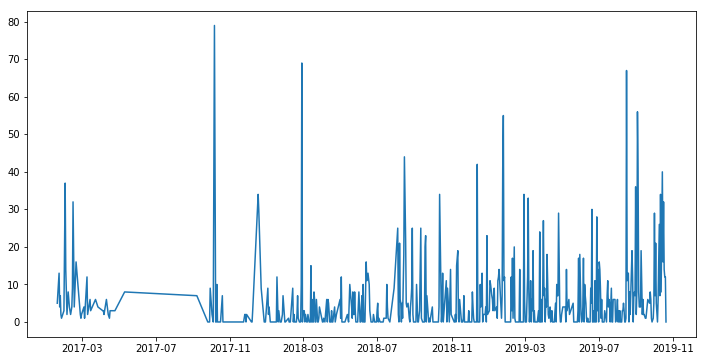

In [200]:
plt.figure(figsize=(12,6))
plt.plot(df_frame['created_date'], df_frame['count_augur'])

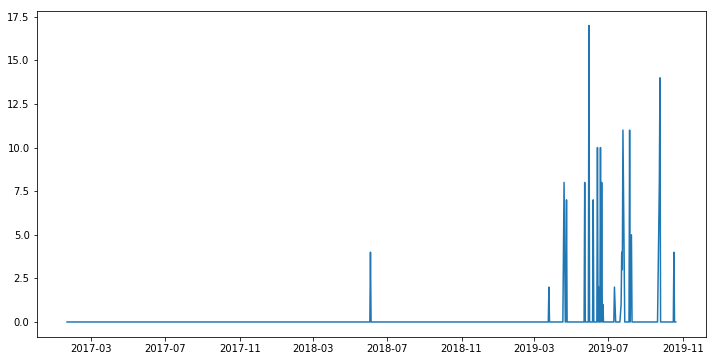

In [202]:
plt.figure(figsize=(12,6))
plt.plot(df_frame['created_date'], df_frame['count_wg_common'])


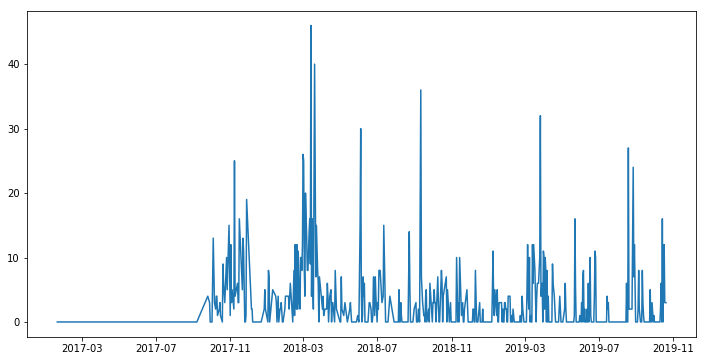

In [203]:
plt.figure(figsize=(12,6))
plt.plot(df_frame['created_date'], df_frame['count_grimoirelab'])


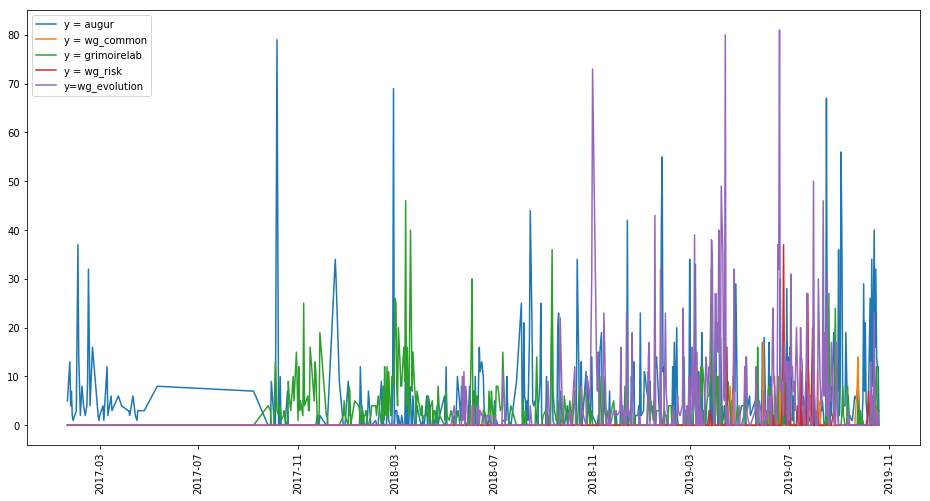

In [206]:
plt.figure(figsize=(16,8))
plt.plot(df_frame['created_date'], df_frame[['count_augur','count_wg_common','count_grimoirelab','count_wg_risk','count_wg_evolution']])
plt.xticks(rotation='vertical')
plt.legend(['y = augur', 'y = wg_common', 'y = grimoirelab', 'y = wg_risk','y=wg_evolution'], loc='upper left')

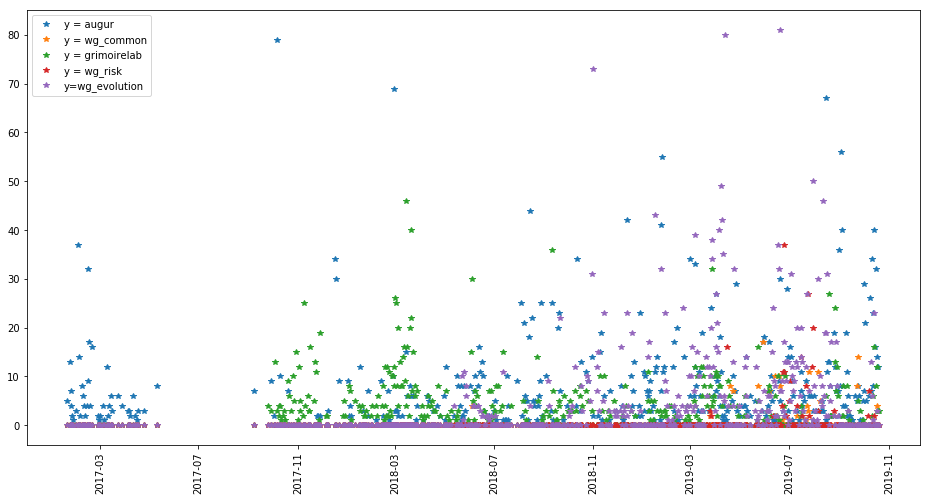

In [207]:
plt.figure(figsize=(16,8))
plt.plot(df_frame['created_date'], df_frame[['count_augur','count_wg_common','count_grimoirelab','count_wg_risk','count_wg_evolution']],'*')
plt.xticks(rotation='vertical')
plt.legend(['y = augur', 'y = wg_common', 'y = grimoirelab', 'y = wg_risk','y=wg_evolution'], loc='upper left')

We can see that Augur is active over entire period of time then WG_EVOLUTION is second most active repository